# MI 1 (2021): Exercise sheet 5

### Exercise H5.1: Cross-validation

This exercise asks you to assess the impact of a regularization penalty on the parameters of a
linear connectionist neuron to solve a regression task with a quadratic cost function. We will
only consider a quadratic regularization term for this exercise.

In [36]:
import math
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data

In [2]:
training_set = np.genfromtxt("TrainingRidge.csv", delimiter = ',', skip_header = True)
validation_set = np.genfromtxt("ValidationRidge.csv", delimiter = ',', skip_header = True)
xt = training_set[:,:2]
yt = training_set[:,-1]
xv = validation_set[:,:2]
yv = validation_set[:,-1]

#### Preprocessing

In [3]:
def center(x):
    '''Returns the centered version of x'''
    x_centered = x - np.sum(x, axis = 0)/len(x)
    return x_centered
    
def sphering_transformation(x):
    '''Creates sphering the transformation built from x.
       returns: \lambda^{-1/2}.E^T'''
    
    x_centered = center(x)
    
    # Covariance matrix
    cov_matrix = np.dot(x_centered.T, x_centered)/len(x)
    
    # Eigenvalues and eigenvectors
    evalue, evector = la.eig(cov_matrix)
    evalue = np.diag(evalue)
    
    sphering = np.sqrt(la.inv(evalue)).dot(evector.T)
    
    return sphering

In [4]:
transformation = sphering_transformation(xt)
xt_sphered = center(xt).dot(transformation.T)
xv_sphered = center(xv).dot(transformation.T)

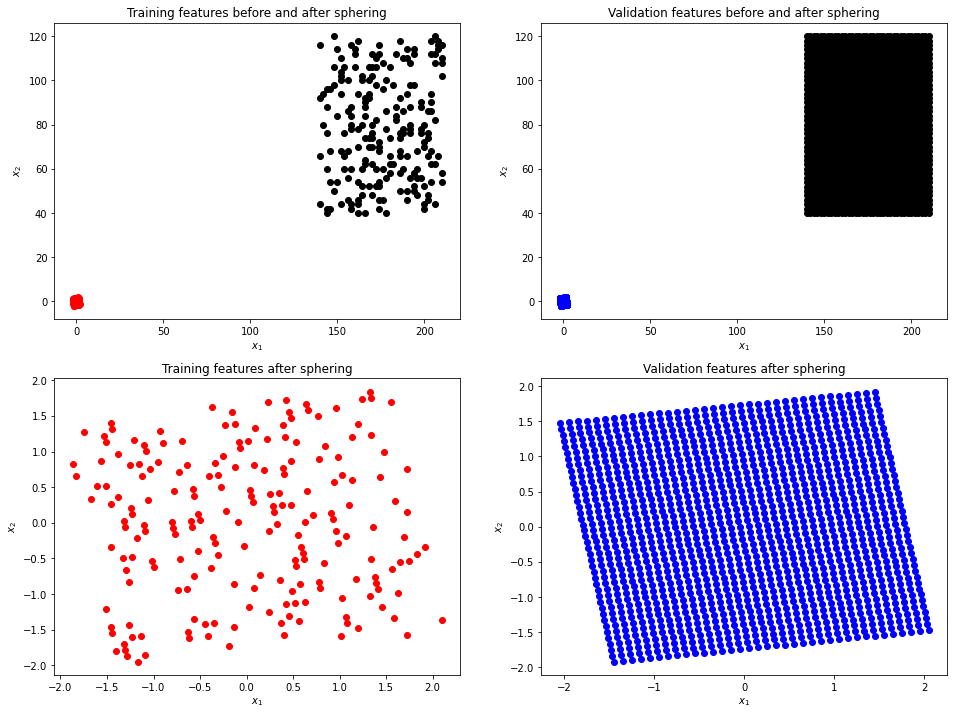

In [5]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (16,12))

# Without sphering
ax0.scatter(xt[:,0], xt[:,1], c = 'black')
ax0.scatter(xt_sphered[:,0], xt_sphered[:,1], c = 'r')
ax0.set_title("Training features before and after sphering")
ax0.set_xlabel("$x_1$")
ax0.set_ylabel("$x_2$")
ax1.scatter(xv[:,0], xv[:,1], c = 'black')
ax1.scatter(xv_sphered[:,0], xv_sphered[:,1], c = 'b')
ax1.set_title("Validation features before and after sphering")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
# With sphering
ax2.scatter(xt_sphered[:,0], xt_sphered[:,1], c = 'r')
ax2.set_title("Training features after sphering")
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax3.scatter(xv_sphered[:,0], xv_sphered[:,1], c = 'b')
ax3.set_title("Validation features after sphering")
ax3.set_xlabel("$x_1$")
ax3.set_ylabel("$x_2$")

plt.show()

#### Feature expansion

In [25]:
def Phi(x, k = 9):
    '''Applies the map Phi on the features x 
    returning a vector with all possible monomials 
    up to degree k built from x'''
    
    return np.array([x[:,0]**l * x[:,1]**m for m in range(k + 1) for l in range(k - m + 1) ])

def linear_model(x, w):
    ''' Applies a linear model to the features x and returns the predicted value y'''
    y = w.T.dot(x)
    return y

In [39]:
phi_xt = Phi(xt_sphered)
w_opt = la.inv(phi_xt.dot(phi_xt.T)).dot(phi_xt).dot(yt)
y_predicted = linear_model(phi_xt, w_opt)

phi_xv = Phi(xv_sphered)

In [42]:
print(phi_xv.shape)

(55, 1476)


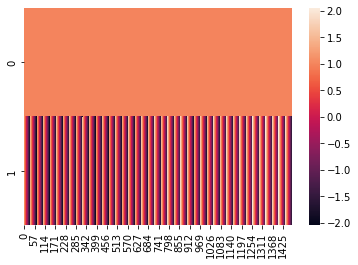

In [45]:
sns.heatmap(phi_xv[:2,:])
plt.show()